# Practica 2

## 1. Descripción del dataset. ¿Por qué es importante y qué pregunta/problema pretende responder?

**Introducción**

Las enfermedades relacionadas con el corazón han sido uno de los factores que se ha incrementado en los últimos tiempos, esto debido al aumento del sedentarismo  que sufre la sociedad actual.
Esta práctica toma como insumo de datos el dataset del sitio kaggle llamado *Heart Attack Analysis & Prediction Dataset:*
https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

**Objetivo**

Con base a las características que encontramos en el Dataset *“Heart Attack Analysis & Prediction Dataset”* tenemos el **objetivo predecir de cuando es más probable que las personas sufran un infarto.**

Se tomarán las características del conjunto de datos para realizar **análisis de regresión y correlación**  para encontrar las características mas relevantes al momento de un infarto y así poder trabajar en la cultura preventiva sobre este tipo de enfermedades.

Comenzamos con la descripción del Dataset **Heart Attack Analysis & Prediction Dataset**.

*Importamos las librerias necesarias para la práctica*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

*Leemos los 5 archivos CSV para realizar nuestra práctica*

In [2]:
#Leemos la data a analizar.
df_heart = pd.read_csv("heart.csv")
#Leemos el catalogo del tipo de dolor de pecho.
df_chest_pain_catalog = pd.read_csv("heart_chest_pain.csv")
#Leemos el catalogo del tipo de output.
df_output_catalog = pd.read_csv("heart_output.csv")
#Leemos la agrupación que hicimos para la edad
df_output_age = pd.read_csv("age.csv")
#Leemos la agrupación que hicimos para el ritmo cardiaco
df_output_heart_rate = pd.read_csv("heart_rate_achieved.csv")

In [3]:
#Vemos los dataframes generados
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df_chest_pain_catalog.head()

,chest_pain,chest_pain_desc
0,1,typical angina
1,2,atypical angina
2,3,non-anginal pain
3,4,asymptomatic
4,0,normal


In [5]:
df_output_catalog.head()

,output,output_desc
0,0,less chance
1,1,more chance


In [6]:
df_output_age.head()

,age,age_desc
0,29,29-39
1,34,29-39
2,35,29-39
3,37,29-39
4,38,29-39


In [7]:
df_output_heart_rate.head()

,maximum_heart_rate_achieved,heart_rate_desc
0,71,70-100
1,88,70-100
2,90,70-100
3,95,70-100
4,96,70-100


*Renombramos las columnas para tener una descripcion mas entendible.*

In [8]:
df_heart.rename(columns={"age":"age"}, inplace=True)
df_heart.rename(columns={"sex":"sex"}, inplace=True)
df_heart.rename(columns={"cp":"chest_pain"}, inplace=True)
df_heart.rename(columns={"trtbps":"resting_blood_pressure"}, inplace=True)
df_heart.rename(columns={"chol":"cholestoral"}, inplace=True)
df_heart.rename(columns={"fbs":"fasting_blood_sugar"}, inplace=True)
df_heart.rename(columns={"restecg":"resting_electrocardiographic"}, inplace=True)
df_heart.rename(columns={"thalachh":"maximum_heart_rate_achieved"}, inplace=True)
df_heart.rename(columns={"exng":"exercise_induced_angina"}, inplace=True)
df_heart.rename(columns={"oldpeak":"previous_peak"}, inplace=True)
df_heart.rename(columns={"caa":"number_major_vessels"}, inplace=True)
df_heart.rename(columns={"thall":"thal_rate"}, inplace=True)
df_heart.rename(columns={"output":"output"}, inplace=True)
df_heart

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slp,number_major_vessels,thal_rate,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


*Análisis exploratorio*

In [9]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           303 non-null    int64  
 1   sex                           303 non-null    int64  
 2   chest_pain                    303 non-null    int64  
 3   resting_blood_pressure        303 non-null    int64  
 4   cholestoral                   303 non-null    int64  
 5   fasting_blood_sugar           303 non-null    int64  
 6   resting_electrocardiographic  303 non-null    int64  
 7   maximum_heart_rate_achieved   303 non-null    int64  
 8   exercise_induced_angina       303 non-null    int64  
 9   previous_peak                 303 non-null    float64
 10  slp                           303 non-null    int64  
 11  number_major_vessels          303 non-null    int64  
 12  thal_rate                     303 non-null    int64  
 13  outpu

In [10]:
df_heart.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slp,number_major_vessels,thal_rate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df_heart.shape


(303, 14)

In [12]:
df_heart.columns


Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral',
       'fasting_blood_sugar', 'resting_electrocardiographic',
       'maximum_heart_rate_achieved', 'exercise_induced_angina',
       'previous_peak', 'slp', 'number_major_vessels', 'thal_rate', 'output'],
      dtype='object')

## 2. Integración y selección de los datos de interés a analizar. 

* Puede ser el resultado de adicionar diferentes datasets o una subselección útil de los datos originales, en base al objetivo que se quiera conseguir.

En esta parte integramos los catalogos que cargamos en el **punto 1**, *chest_pain, output, heart_rate and age* al dataframe principal para continuar con nuestros análsis.

Cabe aclarar que en el catalogo de *age*, agregamos una columna en donde se especifica la agrupación de la edad, en los siguientes análisis lo vamos a demostrar.

In [13]:
#Hacemos un respaldo del dataset original para ocuparlo posteriormente en los análsis de normalidad y homogeneidad.
df_heart_original = df_heart

#Hacemos Join entre los datos "raw" con sus respectivos catalogos.
#Data y tipo de dolor de pecho
df_heart_chest_pain = pd.merge(df_heart, df_chest_pain_catalog, on="chest_pain", how="left")
#Data resultante anterior y tipo de output
df_heart_chest_final = pd.merge(df_heart_chest_pain, df_output_catalog, on="output",  how="left")
#Data resultante anterior y ritmo cardiaco
df_heart_heart_rate_final = pd.merge(df_heart_chest_final, df_output_heart_rate, on="maximum_heart_rate_achieved",  how="left")
#Data resultante anterior y age
df_heart_final = pd.merge(df_heart_heart_rate_final, df_output_age, on="age", how="left" )

df_heart_final

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slp,number_major_vessels,thal_rate,output,chest_pain_desc,output_desc,heart_rate_desc,age_desc
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,non-anginal pain,more chance,141-160,60-65
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,atypical angina,more chance,180-202,29-39
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,typical angina,more chance,161-180,40-50
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,typical angina,more chance,161-180,51-60
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,normal,more chance,161-180,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,normal,less chance,121-140,51-60
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,non-anginal pain,less chance,121-140,40-50
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,normal,less chance,141-160,66-70
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,normal,less chance,100-120,51-60


## Limpieza de los datos.

* ¿Los datos contienen ceros o elementos vacíos? Gestiona cada uno de estos casos.
* Identifica y gestiona los valores extremos.

Obtenemos el número de registro y las columnas que tienen datos nulos(NA).

In [14]:
df_heart_final.isnull().sum()

age                             0
sex                             0
chest_pain                      0
resting_blood_pressure          0
cholestoral                     0
fasting_blood_sugar             0
resting_electrocardiographic    0
maximum_heart_rate_achieved     0
exercise_induced_angina         0
previous_peak                   0
slp                             0
number_major_vessels            0
thal_rate                       0
output                          0
chest_pain_desc                 0
output_desc                     0
heart_rate_desc                 0
age_desc                        0
dtype: int64

No se encuentran valores nulos.

Identificamos los datos duplicados

In [15]:
df_heart_final[df_heart_final.duplicated()]

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slp,number_major_vessels,thal_rate,output,chest_pain_desc,output_desc,heart_rate_desc,age_desc
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1,atypical angina,more chance,161-180,29-39


Se procede con la limpieza de los duplicados.

In [16]:
df_heart_final.drop_duplicates(inplace=True)

Comenzamos a revisar los outliers

Text(0.5, 0, 'age')

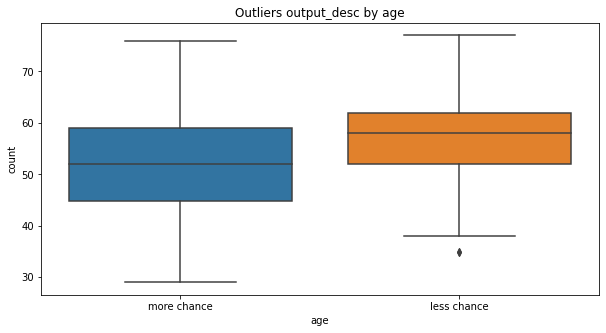

In [17]:
plt.figure(figsize=[10, 5])
sns.boxplot(data=df_heart_final, x="output_desc", y="age");
plt.title("Outliers output_desc by age", fontsize = 12)
plt.ylabel("count", fontsize = 10)
plt.xlabel("age", fontsize = 10)

Aunque no es una cantidad grande, este outlier lo gestionamos creando la columna en el catalogo de *"age"* y agregando la columna a nuestro dataframe final con el nombre de *"age_desc"*

Text(0.5, 0, 'age_desc')

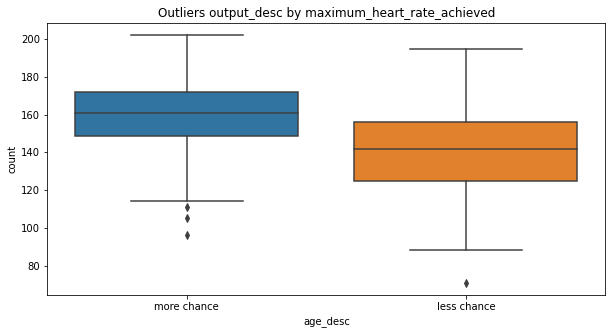

In [18]:
plt.figure(figsize=[10, 5])
#sns.countplot(x=df_heart_final.output_desc, hue=df_heart_final["age_desc"])
sns.boxplot(data=df_heart_final, x="output_desc", y="maximum_heart_rate_achieved");
plt.title("Outliers output_desc by maximum_heart_rate_achieved", fontsize = 12)
plt.ylabel("count", fontsize = 10)
plt.xlabel("age_desc", fontsize = 10)

## 4. Análisis de los datos.
* Selección de los grupos de datos que se quieren analizar/comparar (p. ej., si se van a comparar grupos de datos, ¿cuáles son estos grupos y qué tipo de análisis se van a aplicar?)
* Comprobación de la normalidad y homogeneidad de la varianza.
* Aplicación de pruebas estadísticas para comparar los grupos de datos.
* En función de los datos y el objetivo del estudio, aplicar pruebas de contraste de hipótesis, correlaciones, regresiones, etc. Aplicar al menos tres métodos de análisis diferentes.

Comenzamos con un **análsis de correlación** para ver la asociación que tenemos en las variables de nuestro dataframe unificado *df_heart_final*

Se van a generar valores entre -1 y 1, donde los extremos indican una
correlación perfecta y el 0 indica la ausencia de correlación.

In [19]:
#Analisis de correlación
df_heart_final.corr()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slp,number_major_vessels,thal_rate,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
resting_blood_pressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholestoral,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_blood_sugar,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
resting_electrocardiographic,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
maximum_heart_rate_achieved,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exercise_induced_angina,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
previous_peak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

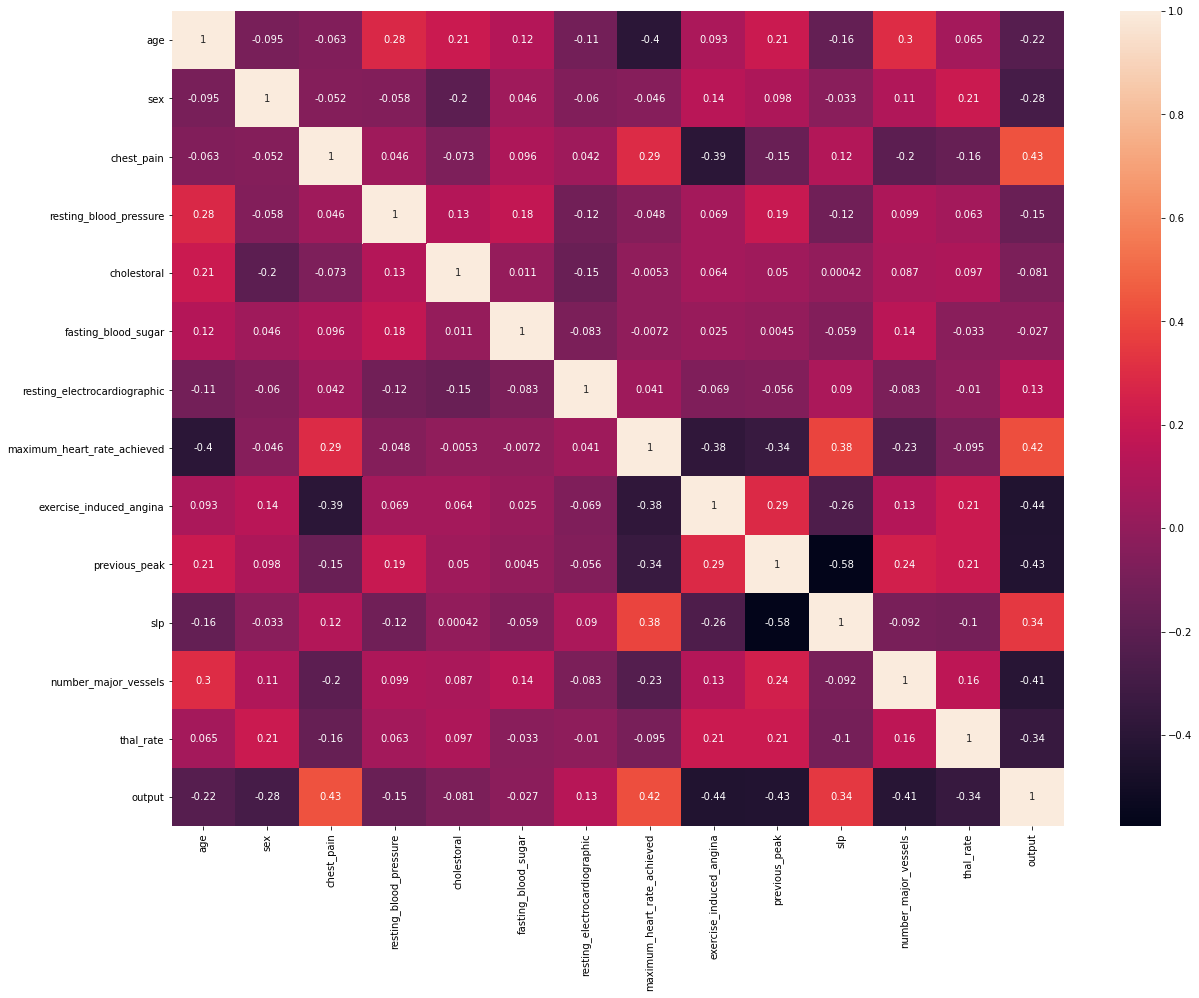

In [20]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_heart_final.corr(), annot=True)

Observamos que la columna *output esta mas correlacionada con chest_pain, maxium_heart_rate_achieved and spl*

Por lo que nos vamos a enfocar en estas columnas para dar respuesta a nuestro objetivo planteado en el **punto 1**, al principio de este documento. 

Generamos un gráfico para conocer la distribución del número de casos donde hay mas posibilidad que se presenten infartos.

<AxesSubplot:xlabel='output_desc', ylabel='count'>

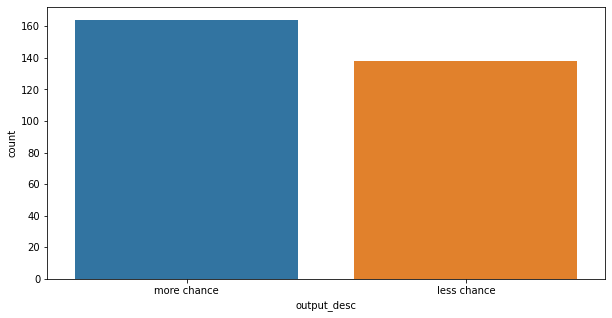

In [21]:
plt.figure(figsize=[10, 5])
plt.ylabel("count", fontsize = 10)
plt.xlabel("output_desc", fontsize = 10)

sns.countplot(x=df_heart_final.output_desc)

Utilizamos la columna chest_pain_desc para saber la distribución del número de casos con respecto a la columna ouput_desc. Cabe aclarar que ouput_desc tiene su origen en output, por lo que:

* output 0 = less chance of heart attack 
* output 1 = more chance of heart attack

Text(0.5, 0, 'chest_pain_desc')

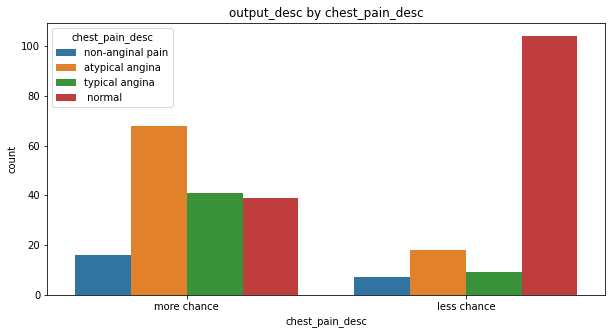

In [22]:
plt.figure(figsize=[10, 5])
sns.countplot(x=df_heart_final.output_desc, hue=df_heart_final["chest_pain_desc"])
plt.title("output_desc by chest_pain_desc", fontsize = 12)
plt.ylabel("count", fontsize = 10)
plt.xlabel("chest_pain_desc", fontsize = 10)

Como se puede observar, el tipo de dolor de pecho *atypical angina*, es donde hay mas posibilidad de que haya un infarto.

Ahora vamos a observar como influye la edad en la probabilidad de que haya infartos. Este gráfico lo dividimos en 2 para probar la reducción de cantidad y discretización.

Utiizando la columna *age*, los gráficos son dificiles de leer.

Text(0.5, 0, 'age')

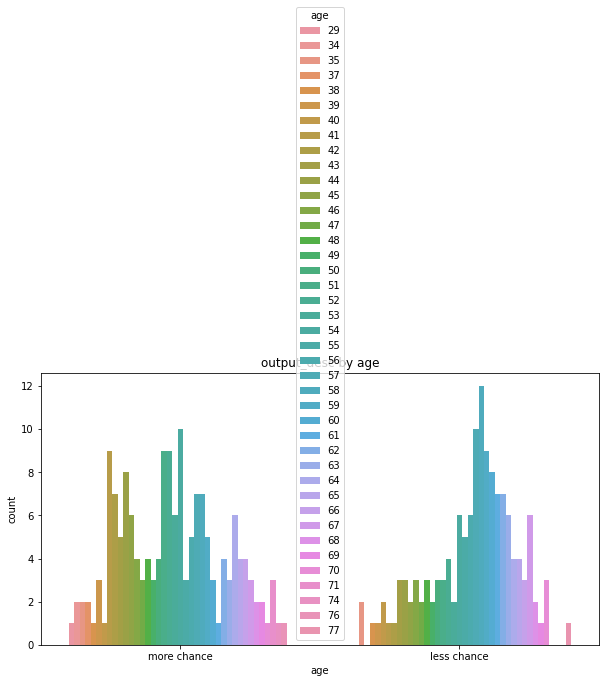

In [23]:
plt.figure(figsize=[10, 5])
sns.countplot(x=df_heart_final.output_desc, hue=df_heart_final["age"])
plt.title("output_desc by age", fontsize = 12)
plt.ylabel("count", fontsize = 10)
plt.xlabel("age", fontsize = 10)

En cambio, cuando utilzamos el campo donde agrupamos las edades, se tiene mejor lectura de los datos por medio del gráfico.

Text(0.5, 0, 'age_desc')

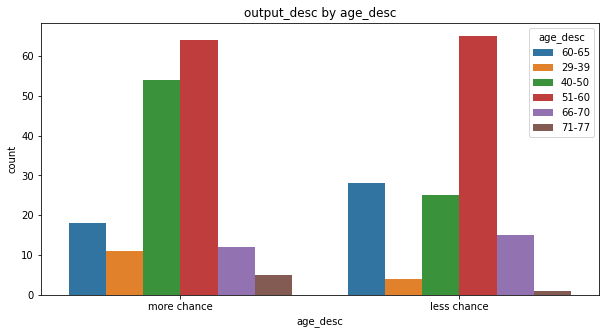

In [24]:
plt.figure(figsize=[10, 5])
sns.countplot(x=df_heart_final.output_desc, hue=df_heart_final["age_desc"])
plt.title("output_desc by age_desc", fontsize = 12)
plt.ylabel("count", fontsize = 10)
plt.xlabel("age_desc", fontsize = 10)

Vemos que a partir de los 40 años, tomando en cuenta ambos sexos, crecen la posibilidad de sufrir un infarto.

Text(0.5, 0, 'heart_rate_desc')

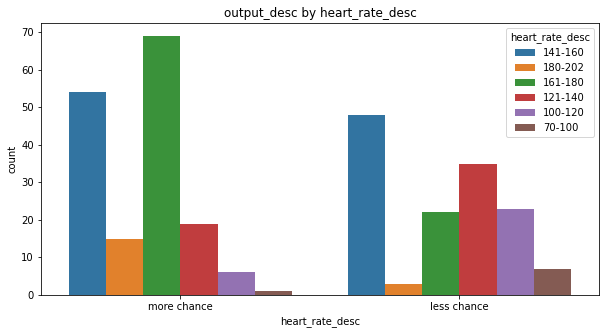

In [25]:
plt.figure(figsize=[10, 5])
sns.countplot(x=df_heart_final.output_desc, hue=df_heart_final["heart_rate_desc"])
plt.title("output_desc by heart_rate_desc", fontsize = 12)
plt.ylabel("count", fontsize = 10)
plt.xlabel("heart_rate_desc", fontsize = 10)

Con este gráfico vemos que a partir del ritmo cardiaco de 140, la probabilidad de un infarto aumenta de forma considerable.

**Regresión logística**

In [26]:
X = df_heart_original.drop("output", axis=1)
y = df_heart["output"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [28]:
model_heart_attack = LogisticRegression(max_iter=1000)

In [29]:
model_heart_attack.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [30]:
#Traning Accuracy
model_heart_attack.score(X_train, y_train)

0.8636363636363636

In [31]:
#Test Accuracy
model_heart_attack.score(X_test, y_test)

0.8524590163934426

In [32]:
X_test

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slp,number_major_vessels,thal_rate
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [33]:
model_heart_attack.predict(X = X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

**Matríz de confusión**

[[25  4]
 [ 5 27]]


<AxesSubplot:>

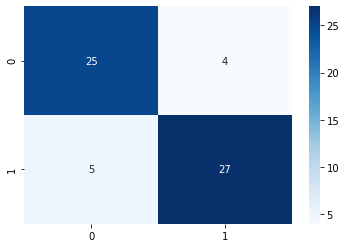

In [34]:
model_heart_attack_prediction = model_heart_attack.predict(X = X_test)
confusionmatrix_heart_attack_prediction = metrics.confusion_matrix(y_test, model_heart_attack_prediction)
print(confusionmatrix_heart_attack_prediction)
sns.heatmap(confusionmatrix_heart_attack_prediction, annot=True,  cmap="Blues")

**Análisis de la distribución de la normalidad de los datos**

C:\Users\olaslu02\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.9863715767860413, pvalue=0.005801409482955933)

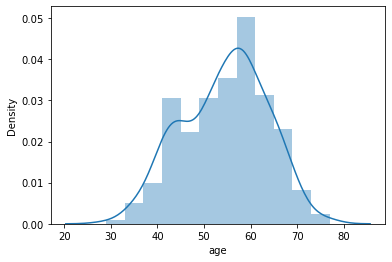

In [35]:
#Age
sns.distplot(df_heart_original["age"], kde=True)
stats.shapiro(df_heart_original["age"])

In [36]:
#output
stats.shapiro(df_heart_original["output"])

ShapiroResult(statistic=0.6335940361022949, pvalue=5.667309370347439e-25)

In [37]:
#maximum_heart_rate_achieved
stats.shapiro(df_heart_original["maximum_heart_rate_achieved"])

ShapiroResult(statistic=0.9763151407241821, pvalue=6.620329077122733e-05)

C:\Users\olaslu02\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ShapiroResult(statistic=0.965917706489563, pvalue=1.4580031120203785e-06)

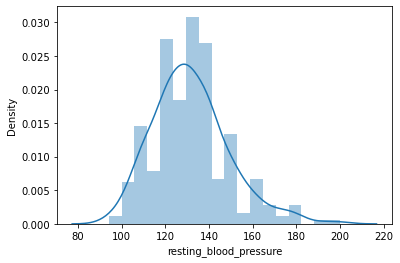

In [38]:
#resting_blood_pressure
sns.distplot(df_heart_original["resting_blood_pressure"], kde=True)
stats.shapiro(df_heart_original["resting_blood_pressure"])

C:\Users\olaslu02\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


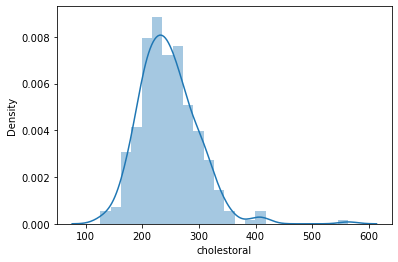

ShapiroResult(statistic=0.9468814134597778, pvalue=5.364669153351542e-09)


In [39]:
#cholestoral
sns.distplot(df_heart_original["cholestoral"], kde=True)
plt.show()
print(stats.shapiro(df_heart_original["cholestoral"]))

**Comprobación de la homocedasticidad**

In [40]:
#Vamos a utilizar el test de "Fligner-Killeen" ya que los datos no cumplen con una distribución normal.
print(stats.fligner(df_heart_original["output"], df_heart_original["chest_pain"], center="median"))


FlignerResult(statistic=100.7120267511718, pvalue=1.0637769001747002e-23)


In [41]:
print(stats.fligner(df_heart_original["output"], df_heart_original["age"], center="median"))


FlignerResult(statistic=339.46858788301904, pvalue=8.329193801476473e-76)


In [42]:
print(stats.fligner(df_heart_original["output"], df_heart_original["resting_blood_pressure"], center="median"))

FlignerResult(statistic=292.1629911856713, pvalue=1.6798327578547844e-65)


**6. Resolución del problema** 
A partir de los resultados obtenidos: 
* ¿Cuáles son las conclusiones? 
* ¿Los resultados permiten responder al problema?

**Conclusión**

Después de aplicar los análisis estadísticos de tipo descriptivo e inferencial al conjunto de datos *Heart Attack Analysis & Prediction Dataset*, vemos que las variables que influyen más en los infartos son:

* chest_pain
* maxium_heart_rate_achieved

Aunque en nuestro análisis de correlación, la variable *age* no figura, también se hizo un análisis tomando en cuenta esta variable, dando por resultado que la edad si es un factor en el número de infartos.

Se realizo un análisis de regresión logística, en donde la precisión de nuestro algoritmo fue del 86.36%, el cual no es bueno, ya que al tratarse un tema de salud, en mi opinión, deberíamos tener una precisión de al menos un 98% para disminuir el riesgo de realizar análisis erróneos y pueda provocar pérdida de vidas.

Como conclusión, el conjunto de datos *Heart Attack Analysis & Prediction Dataset*, necesita recabar más datos para ofrecer resultados más confiables.


**Contribuciones**
* Investigación previa: Luis Enrique Olascoaga Dominguez
* Redacción de las respuestas: Luis Enrique Olascoaga Dominguez
* Desarrollo del código: Luis Enrique Olascoaga Dominguez
* Participación en el vídeo: Luis Enrique Olascoaga Dominguez